In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [2]:
data=np.loadtxt("../week7result/best_fit1.txt")

In [3]:
data

array([9.0e-04, 7.8e+00, 1.0e-03, 8.9e+00, 1.0e-03, 8.0e+00, 1.0e-03,
       7.9e+00, 9.0e-04, 9.4e+00, 1.0e-03, 9.8e+00, 9.0e-04, 7.0e+00,
       1.0e-03, 7.7e+00, 1.0e-03, 9.3e+00, 9.0e-04, 7.8e+00, 1.0e-03,
       7.6e+00, 1.0e-03, 8.0e+00, 1.0e-03, 7.9e+00, 1.0e-03, 7.6e+00,
       9.0e-04, 8.7e+00, 9.0e-04, 6.9e+00, 9.0e-04, 8.2e+00, 1.0e-03,
       7.9e+00, 1.0e-03, 9.8e+00, 1.0e-03, 8.2e+00])

In [2]:
total_xe=np.load("totalxe.npy")
total_z=np.load("totalz.npy")

In [3]:
Tcmb=2.75*10**6
sigma_nu=2*np.pi/180/60
theta_nu=30*np.pi/180/60
f_sky=1
delta_l=1

ell=31

points=[]
errors=[]

with open("../planck.csv", "r") as csvfile:
    reader = csv.reader(csvfile)
    cols = [float(row[1]) for row in reader]

points=[cols[i] for i in range(len(cols)) if i%2==0]
errors=[cols[i] for i in range(len(cols)) if i%2==1]
errors=[errors[i]-points[i] for i in range(len(points))]

In [12]:
content=['output=pCl,lCl\n','modes=s,t\n','reio_parametrization=reio_many_tanh\n','lensing=yes\n','thermodynamics_verbose=0\n','write thermodynamics=yes\n','r=0.001\n']

def write_ps(zs,xes):
    with open('check.ini','w') as f:
            for i in range(len(content)):
                f.write(content[i])
            f.write("many_tanh_num=")
            f.write(str(int(len(zs)))+"\n")
            f.write("many_tanh_z=")
            for i in zs:
                 f.write(str(round(i,10))+",")
            f.seek(f.tell() - 1, os.SEEK_SET)
            f.write("\n")
            f.write("many_tanh_xe=")
            for i in xes:
                 f.write(str(round(i,10))+",")
            f.seek(f.tell() - 1, os.SEEK_SET)
            f.write("\n")


In [5]:
def plot_xe(num):
    if num<10:
        data1=np.loadtxt('/home/hcjiang/class/output/check0'+str(num)+'_thermodynamics.dat')
    else:
        data1=np.loadtxt('/home/hcjiang/class/output/check'+str(num)+'_thermodynamics.dat')
    data2=np.loadtxt('/home/hcjiang/class/output/base_2018_plikHM_TTTEEE_lowl_lowE_lensing00_thermodynamics.dat')

    z1=data1[0:1200,1]
    z2=data2[0:1200,1]
    xe1=data1[0:1200,3]
    xe2=data2[0:1200,3]

    plt.plot(z1,xe1,label="random")
    plt.plot(z2,xe2,label="best_fit")
    plt.legend()
    plt.show()

In [6]:
def plot_ps(num):
    if num<10:
        data1=np.loadtxt('/home/hcjiang/class/output/check0'+str(num)+'_cl_lensed.dat')
    else:
        data1=np.loadtxt('/home/hcjiang/class/output/check'+str(num)+'_cl_lensed.dat')
    data2=np.loadtxt('/home/hcjiang/class/output/base_2018_plikHM_TTTEEE_lowl_lowE_lensing00_cl_lensed.dat')

    l1=data1[:,0]
    l2=data2[:,0]
    EE1=data1[:,1]
    EE2=data2[:,2]
    plt.plot(l1[0:ell-2],EE1[0:ell-2]*(2.7255e6)**2,label="random")
    plt.plot(l2[0:ell-2],EE2[0:ell-2]*(2.7255e6)**2,label="best-fit")
    plt.errorbar(np.arange(2,ell,1),points,yerr=errors,label="paper",fmt="o")
    plt.yscale('log')
    plt.legend()
    plt.show()

In [13]:
os.chdir("/home/hcjiang/class")

os.getcwd()

'/home/hcjiang/class'

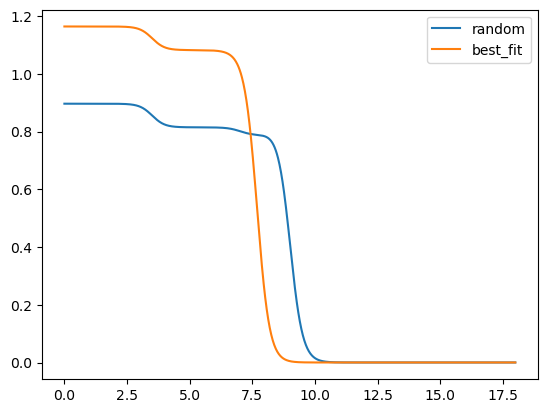

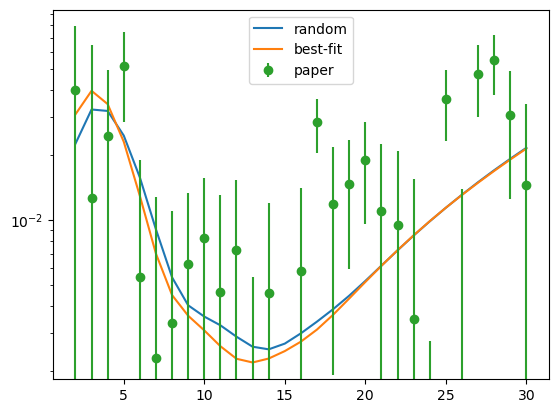

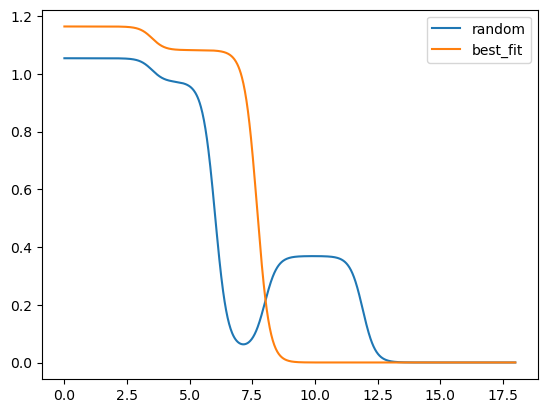

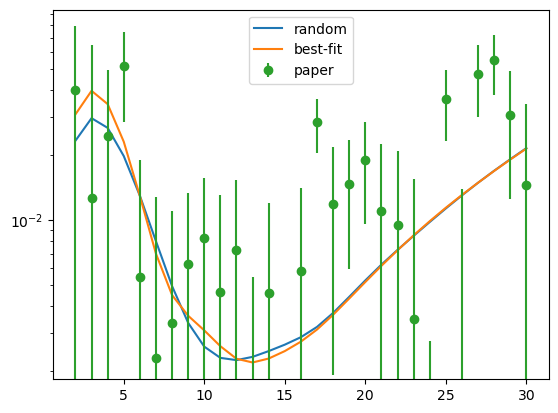

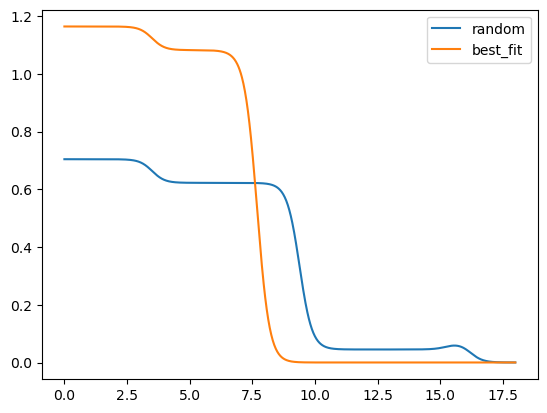

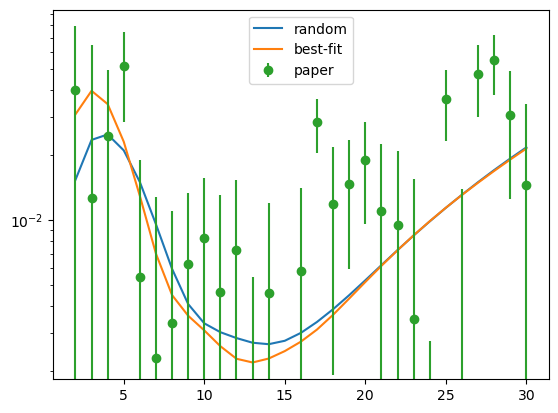

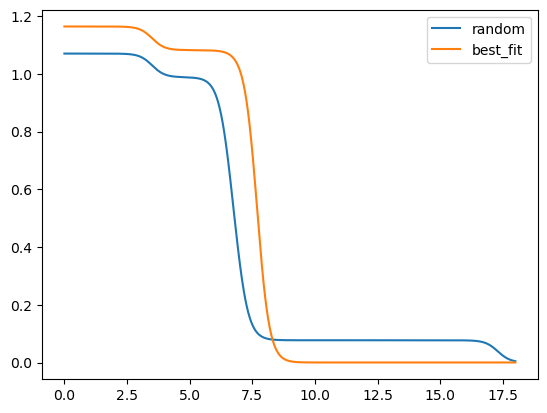

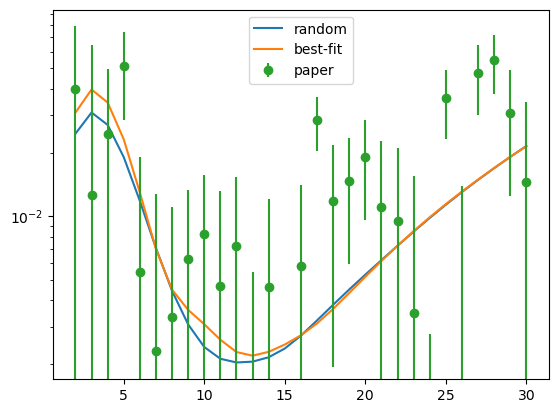

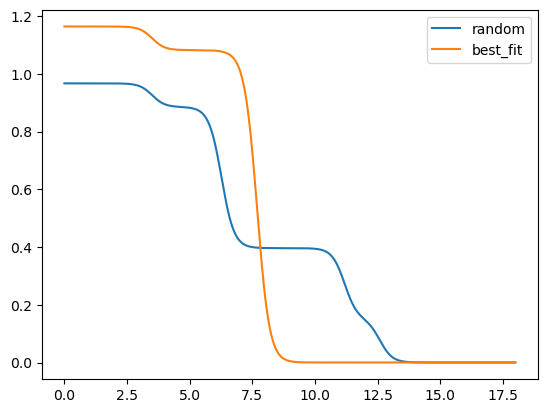

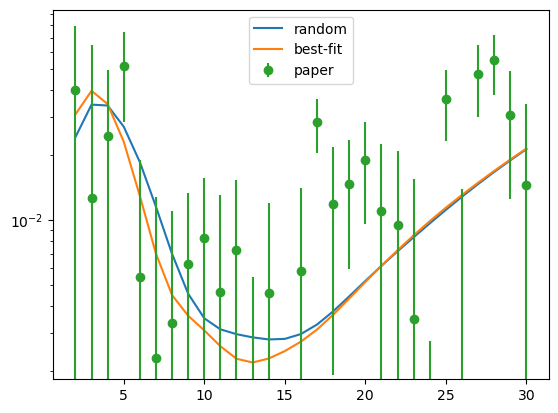

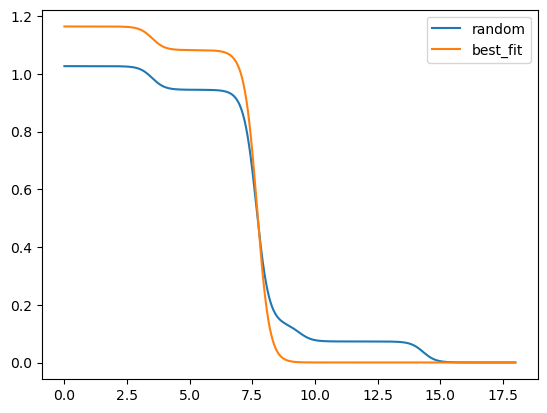

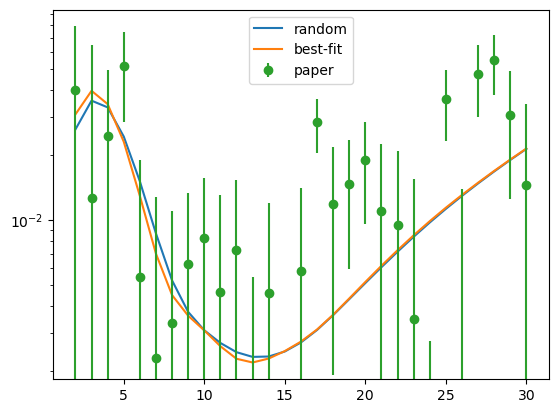

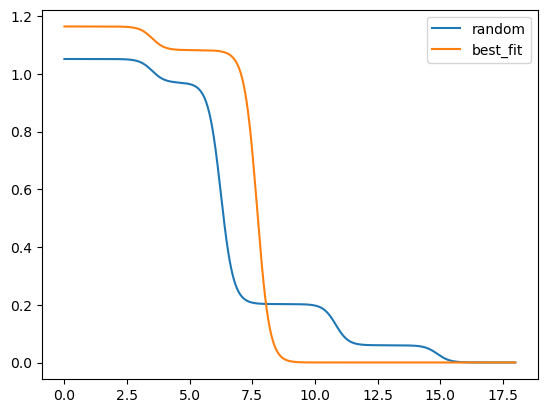

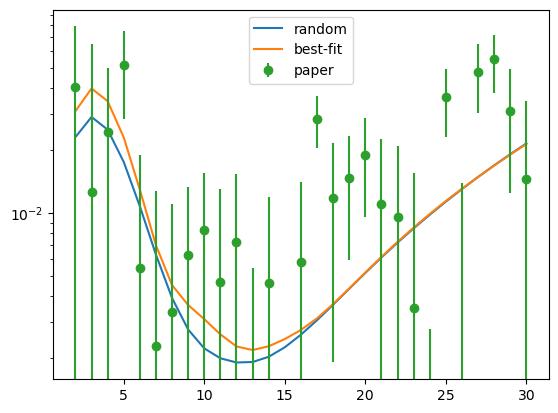

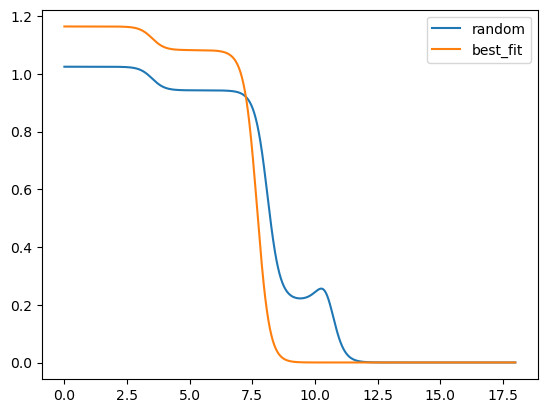

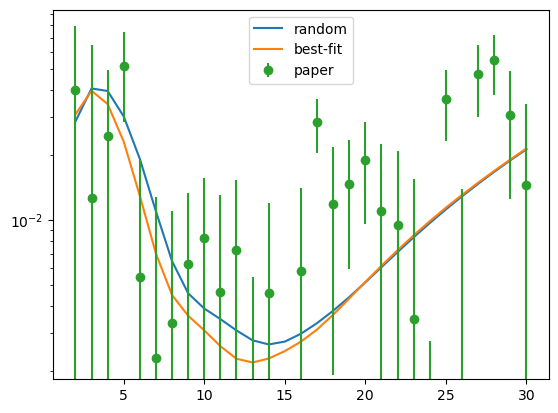

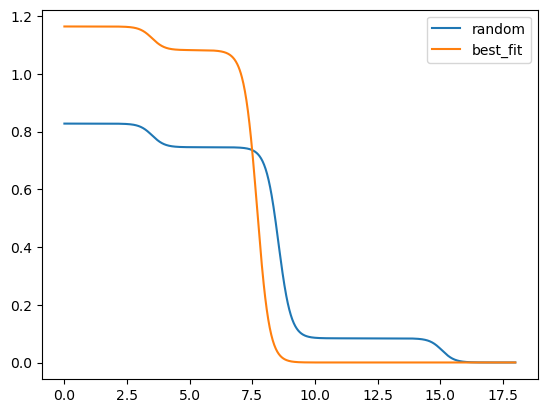

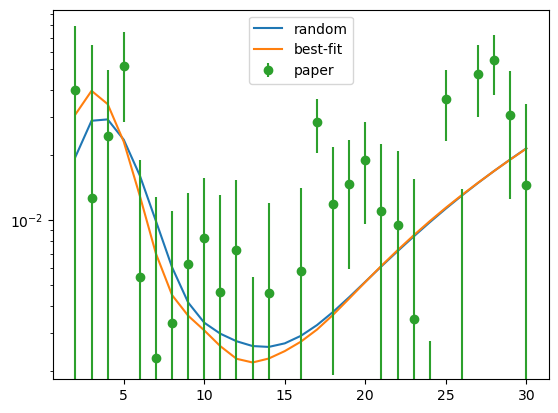

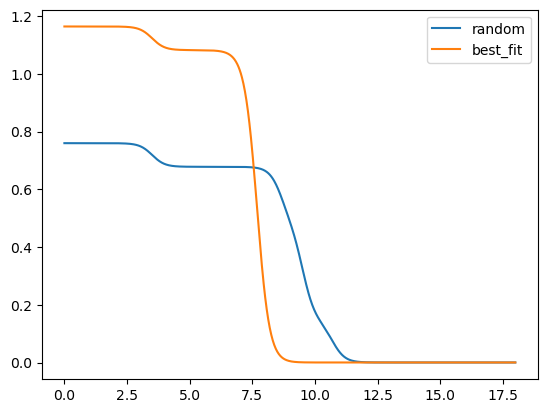

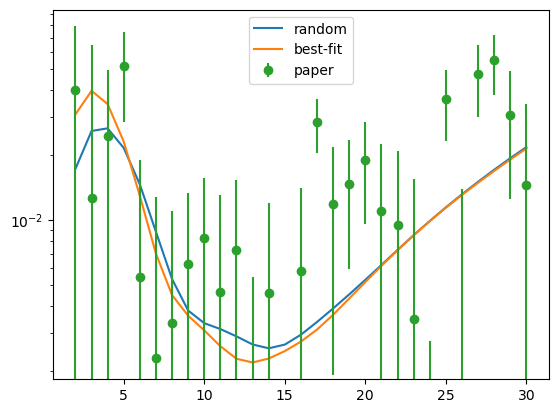

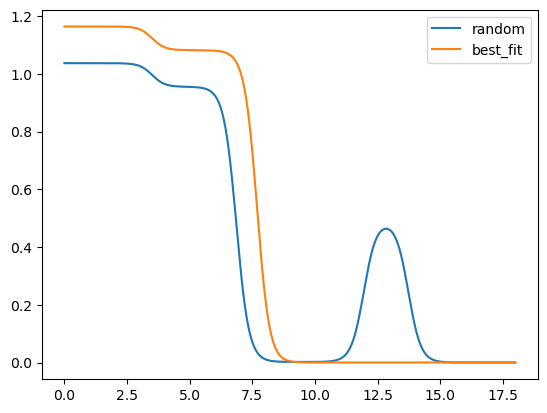

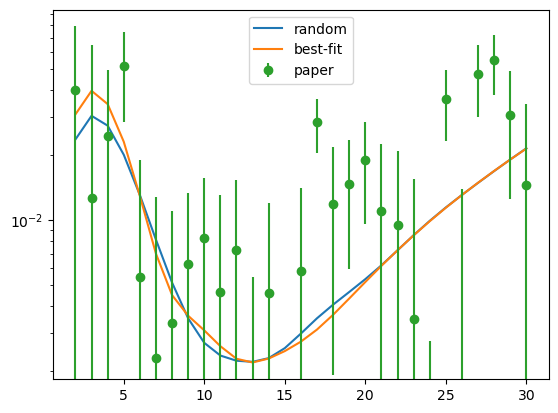

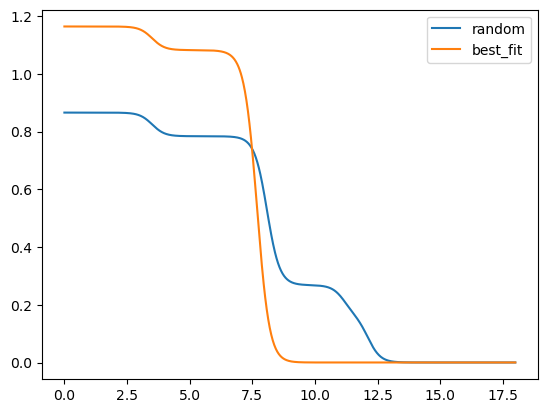

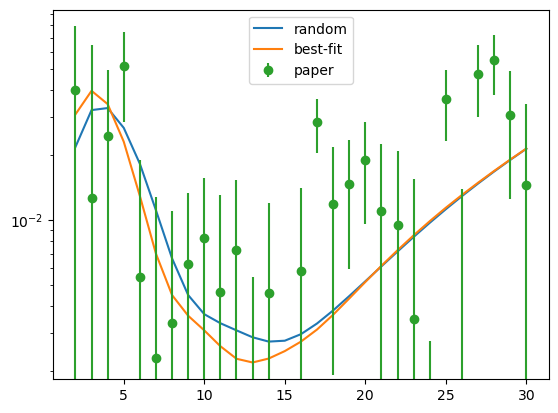

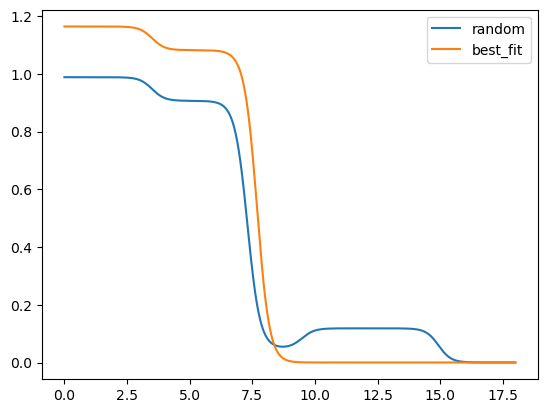

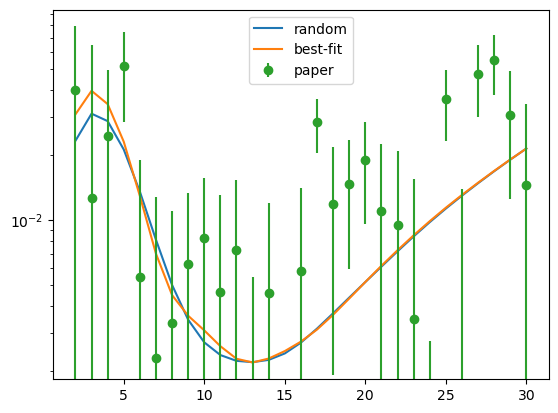

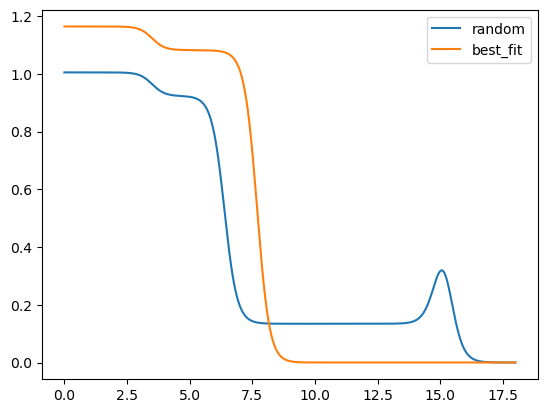

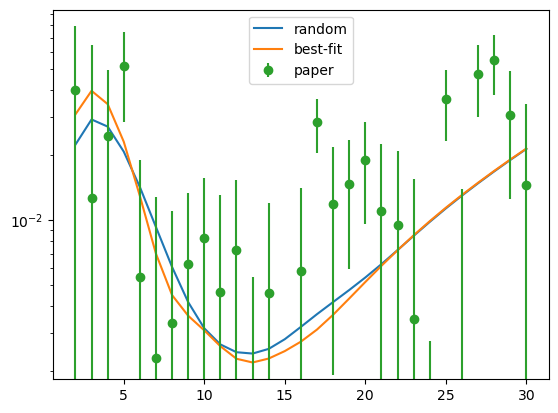

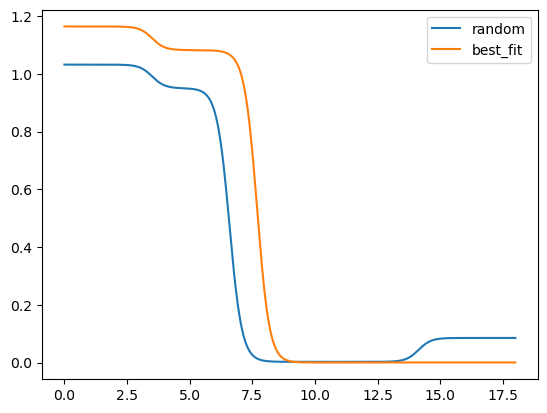

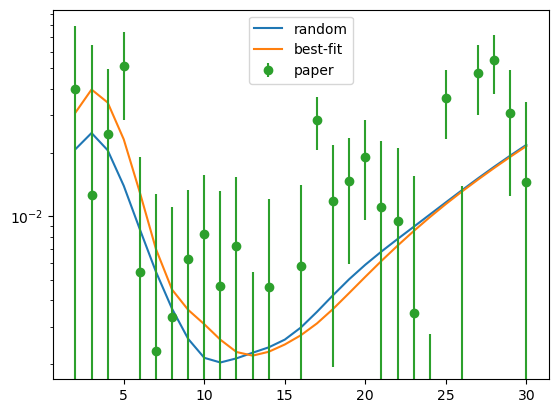

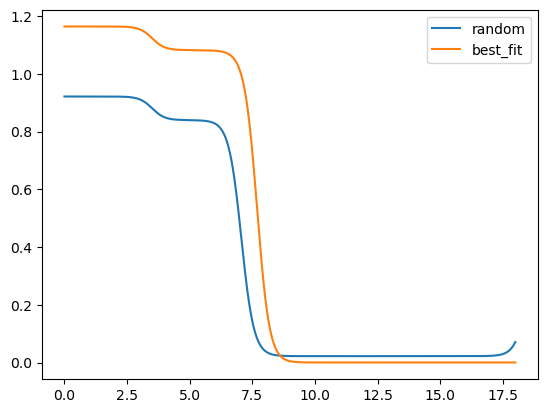

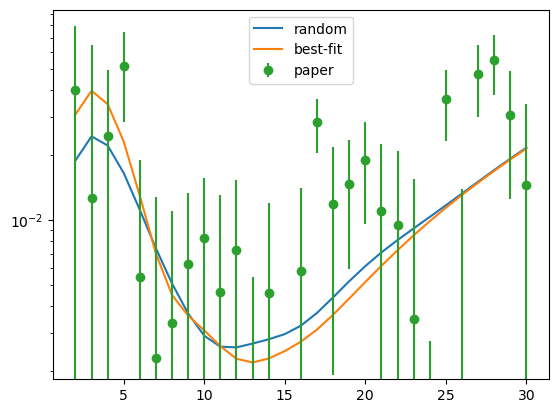

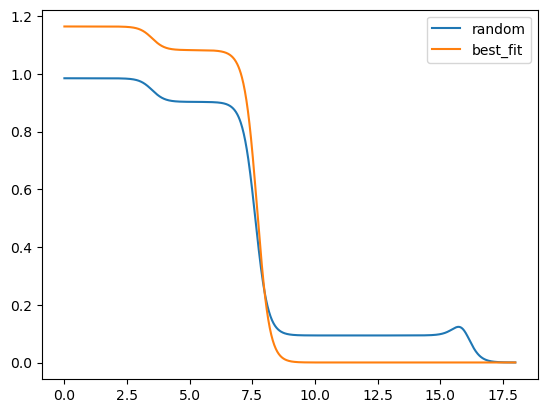

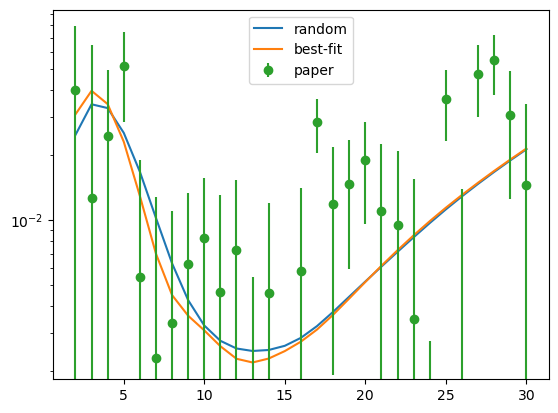

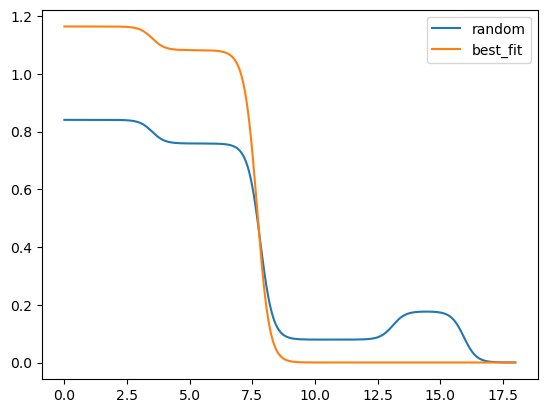

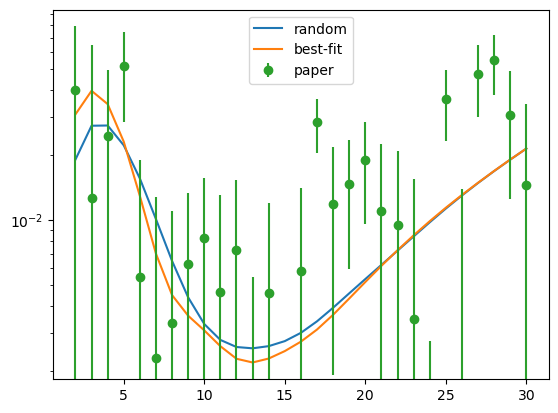

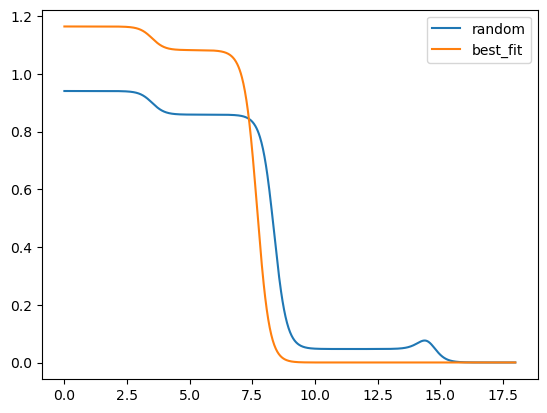

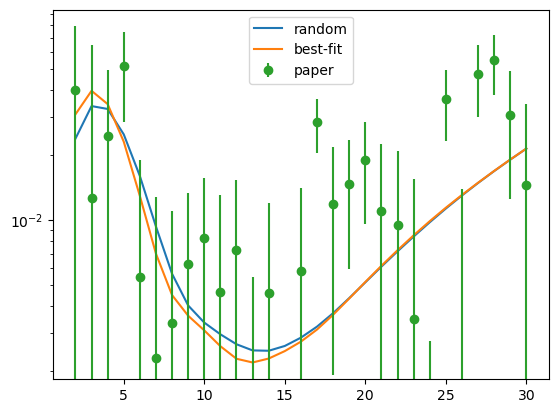

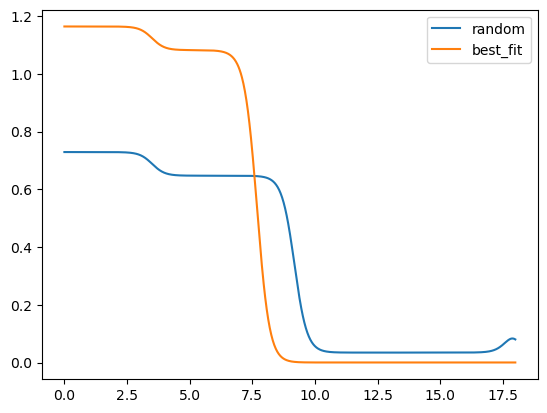

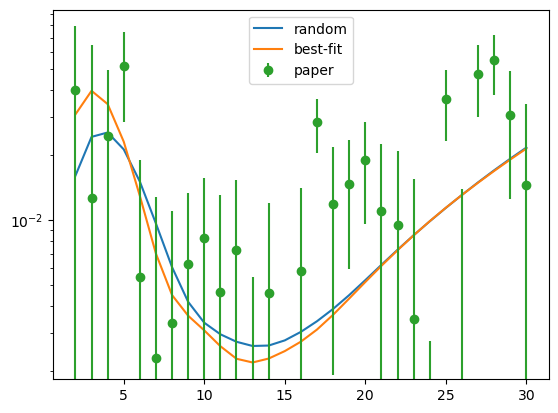

0

In [15]:
for i in range(len(total_xe)):
    write_ps(total_z[i],total_xe[i])
    os.system('./class check.ini')
    plot_xe(i)
    plot_ps(i)

os.system("rm -rf output/check*dat")
    
    

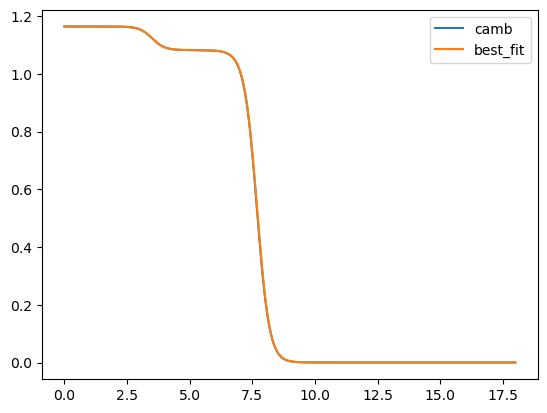

In [7]:
data1=np.loadtxt('/home/hcjiang/class/output/reio_camb00_thermodynamics.dat')
data2=np.loadtxt('/home/hcjiang/class/output/base_2018_plikHM_TTTEEE_lowl_lowE_lensing00_thermodynamics.dat')

z1=data1[0:1200,1]
z2=data2[0:1200,1]
xe1=data1[0:1200,3]
xe2=data2[0:1200,3]

plt.plot(z1,xe1,label="camb")
plt.plot(z2,xe2,label="best_fit")
plt.legend()
plt.show()

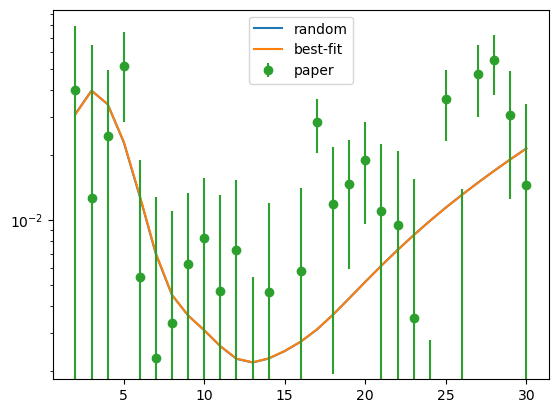

In [11]:
data1=np.loadtxt('/home/hcjiang/class/output/reio_camb00_cl_lensed.dat')
data2=np.loadtxt('/home/hcjiang/class/output/base_2018_plikHM_TTTEEE_lowl_lowE_lensing00_cl_lensed.dat')

l1=data1[:,0]
l2=data2[:,0]
EE1=data1[:,1]
EE2=data2[:,2]
plt.plot(l1[0:ell-2],EE1[0:ell-2]*(2.7255e6)**2,label="random")
plt.plot(l2[0:ell-2],EE2[0:ell-2]*(2.7255e6)**2,label="best-fit")
plt.errorbar(np.arange(2,ell,1),points,yerr=errors,label="paper",fmt="o")
plt.yscale('log')
plt.legend()
plt.show()